## Program to scrap facebook messages

### Programmer: Rafael Mata M.
### Creation date: 12 Jan 2022
### Modification date: 24 jan 2022

---


## Facebook scrapper to extract information

https://medium.com/analytics-vidhya/facebook-post-scraping-and-text-analytics-9eea10563a3a

In [85]:
# Import libraries to be used
import pandas as pd
from facebook_scraper import get_posts

In [49]:
def get_facebook_post_comments(post_urls, file_name, cookies_file):
    ''' Function to get the comments from a specific post url
    
    
        Params:
        ---------------
        post_urls: list with the post number
        file_name: str, file_name to save the results
        cookies_files: str, filename with the facebook page cookies
        
        Returns:
        ---------------
        df : pandas dataframe with the results
        
    
    
    '''

    post_list = []
    post_number = 0

    for post_info in get_posts(post_urls = post_urls, cookies = cookies_file ,timeout = 1000, extra_info = True, options={"comments": "generator", "reactors": False, "progress":False, "posts_per_page": 5}):
        post_number += 1
        print("\nPOST Nº", post_number, " - URL: ", post_info["post_url"])
        print("ID: ", post_info["post_id"])
        print("POST TEXT: ", post_info["post_text"])
        print("TIME: ", post_info["time"], " - ", "TIMESTAMP: ", post_info["timestamp"])
        print("LIKES: ", post_info["likes"])
        print("COMMENTS: ", post_info["comments"])
        print("SHARES: ", post_info["shares"])
        post_list.append(post_info)  # Add post to list

    print("TOTAL POSTS RECOVERED: ", len(post_list))

    # Create DataFrame
    df = pd.DataFrame(data=post_list)

    # Save as csv, using the channel name to differ files
    name_file = "".join(["facebook_scraper_result_", channel_str.upper(), file_name,".csv"])
    df.to_csv(name_file)
    
    return df

In [51]:
post_urls = ['872018186807470']
file_name = 'test'
cookies_file = 'cookies.txt'
df = get_facebook_post_comments(post_urls, file_name, cookies_file)


POST Nº 1  - URL:  https://facebook.com/story.php?story_fbid=872018186807470&id=178354205530380
ID:  872018186807470
POST TEXT:  Inicia #LaDiscusiónPresidencial en vivo por NCR Noticias
TIME:  2022-01-17 19:56:00  -  TIMESTAMP:  None
LIKES:  1806
COMMENTS:  29716
SHARES:  985
TOTAL POSTS RECOVERED:  1


In [62]:
def get_facebook_posts(channel_str, pages, file_name, cookies_file ):
    ''' Function to get the comments from a specific post url
    
    
        Params:
        ---------------
        post_urls: list with the post number
        file_name: str, file_name to save the results
        cookies_files: str, filename with the facebook page cookies
        
        Returns:
        ---------------
        df : pandas dataframe with the results
        
    '''


    # You can lower parameters values to run faster
    post_list = []
    post_number = 0
    
    for post_info in get_posts(channel_str, pages=pages, cookies = cookies_file,timeout = 1000, extra_info = True, options={"comments": False, "reactors": True, "progress":False, "posts_per_page": 5}):
        post_number += 1
        print("\nPOST Nº", post_number, " - URL: ", post_info["post_url"])
        print("ID: ", post_info["post_id"])
        print("POST TEXT: ", post_info["post_text"])
        print("TIME: ", post_info["time"], " - ", "TIMESTAMP: ", post_info["timestamp"])
        print("LIKES: ", post_info["likes"])
        print("COMMENTS: ", post_info["comments"])
        print("SHARES: ", post_info["shares"])
        post_list.append(post_info)  # Add post to list

    print("TOTAL POSTS RECOVERED: ", len(post_list))

    # Create DataFrame
    df = pd.DataFrame(data=post_list)

    # Save as csv, using the channel name to differ files
    name_file = "".join(["facebook_scraper_result_", channel_str.upper(), file_name,".csv"])
    df.to_csv(name_file)
    
    df['Page'] = channel_str
    
    return df

In [92]:
#Candidate list
channel_str_list = ['WelmerRamos', 'FabricioAlvaradoCostaRica', 'Figuerescr', 'villaltaJM', 'efeinzaig', 'LinethSaborio',
                    'Cordero2022','conozcaarodrigochaves', 'GreivinMoyaCR', 'rolandoarayacrj','CruickshankSmith',
                   'NataliaDiazCR']

channel_str_list_2 = ['oscarlopezcostarica','MalavassiPresidente', 'DrHernandez.CR','Piza2022','jhon.vega.923','drwaltermunozpresidente2022',
                   'SergioMenaPNG','Dr.ChristianRivera','maricela.morales.37','drjimenezch','MartinChinchillaCastro','carmen.quesadasantamaria',
                   'crpresidente49','GlorianaSalasML','LeslieDiputada2022']


In [93]:
len(channel_str_list_2)

15

In [88]:

cookies_file = 'cookies.txt'
file_name = 'WelmerRamos'
pages = 5
channel_str = 'WelmerRamos'

df_final = pd.DataFrame()
for channel_str in channel_str_list_2:
    df = get_facebook_posts(channel_str, pages, channel_str, cookies_file )
    df_final = pd.concat([df_final,df])
    



POST Nº 1  - URL:  https://facebook.com/WelmerRamos/posts/454946182756827
ID:  454946182756827
POST TEXT:  Hoy realizamos la firma de nuestro “Compromiso a favor de los Derechos Humanos de las Mujeres.”
#votáseriedad #votáprogresismo
#votácompromiso #welmerramospresidente
TIME:  2022-01-24 09:45:07  -  TIMESTAMP:  1643039107
LIKES:  23
COMMENTS:  5
SHARES:  4

POST Nº 2  - URL:  https://facebook.com/WelmerRamos/posts/802747357791781
ID:  802747357791781
POST TEXT:  Estamos En Vivo en la firma de Compromisos a favor de los Derechos Humanos de las Mujeres.
#votáseriedad #votáprogresismo
#welmerramospresidente #votácompromiso
TIME:  2022-01-24 08:30:58  -  TIMESTAMP:  1643034658
LIKES:  147
COMMENTS:  37
SHARES:  25

POST Nº 3  - URL:  https://facebook.com/WelmerRamos/posts/454588319459280
ID:  454588319459280
POST TEXT:  Si querés conocer más acerca de nuestras propuestas en el tema ambiental o nuestro Plan de Gobierno te invitamos a visitar www.pac.cr
#votáseriedad #votáprogresismo #vo

TemporarilyBanned: You’re Temporarily Blocked

In [91]:
df_final.to_csv('Primeros_12_candidatos.csv')

In [65]:
df.iloc[0].reactors

[{'name': 'Kattia Vargas',
  'link': 'https://facebook.com/profile.php?id=100075626465568&fref=pb',
  'type': 'love'},
 {'name': 'Rafael Olles Molina',
  'link': 'https://facebook.com/profile.php?id=100006199935311&fref=pb',
  'type': 'like'},
 {'name': 'Joshua Torres',
  'link': 'https://facebook.com/joshua.torres.773776?fref=pb',
  'type': 'like'},
 {'name': 'Xinia Moya Pizarro',
  'link': 'https://facebook.com/xinia.moyapizarro?fref=pb',
  'type': 'like'},
 {'name': 'Iris Collado',
  'link': 'https://facebook.com/iris.collado.73?fref=pb',
  'type': 'like'},
 {'name': 'Michael MB',
  'link': 'https://facebook.com/profile.php?id=100000847696157&fref=pb',
  'type': 'like'},
 {'name': 'Luis Alberto Díaz Espinoza',
  'link': 'https://facebook.com/luisalberto.diazespinoza.9?fref=pb',
  'type': 'like'}]

In [11]:
comments = []

In [14]:
len(comments)

330

In [13]:
for i in df.iloc[0].comments_full:
    comments.append(i)

In [15]:
df3 = pd.DataFrame({'comments': comments})

In [16]:
df3

,comments
0,"{'comment_id': '322295059640038', 'comment_url..."
1,"{'comment_id': '228263959501398', 'comment_url..."
2,"{'comment_id': '616197972770957', 'comment_url..."
3,"{'comment_id': '451703526609664', 'comment_url..."
4,"{'comment_id': '512286986824912', 'comment_url..."
...,...
325,"{'comment_id': '666386521211222', 'comment_url..."
326,"{'comment_id': '455946242829489', 'comment_url..."
327,"{'comment_id': '635212664458663', 'comment_url..."
328,"{'comment_id': '1774476482751310', 'comment_ur..."


In [164]:
df3.to_csv('debate2_comments.csv')

In [176]:
for comment in df3.comments:
    for k,v in comment['comments'].items():
        print(k,v)

comment_id 951403559112389
comment_url https://facebook.com/951403559112389
commenter_id 100076001101102
commenter_url https://facebook.com/GlorianaSalasML?fref=nf&pn_ref=story&rc=p&refid=52&__tn__=R
commenter_name Gloriana Salas - Diputada ML
commenter_meta None
comment_text 🔴⚪️🔴⚪️🔴🔝🔝🔝🔝Luis Alberto cordero arias
comment_time 2022-01-10 21:17:30
comment_image None
comment_reactors []
comment_reactions None
comment_reaction_count None
replies []


In [17]:
df4 = pd.concat([df3, df3["comments"].apply(pd.Series)], axis=1)

In [32]:
df4.commenter_name.value_counts().count()

244

In [19]:
libertario = 'Movimiento | Luis | Libert | Albert'

In [35]:
df4[df4.comment_text.str.contains(libertario,case=False)].commenter_name.value_counts().count()

7

In [66]:
(400+95)/5

99.0

In [30]:
lineth = 'welmer | pac | ramos'

In [31]:
df4[df4.comment_text.str.contains(lineth,case=False)].commenter_name.value_counts().count()

20

In [22]:
eli = 'Eli | liberal | progresista | plp'

In [23]:
df4[df4.comment_text.str.contains(eli,case=False)].commenter_name.value_counts().count()

30

In [24]:
chaves = 'Rodrigo | Chaves | pilar |economista'

In [25]:
df4[df4.comment_text.str.contains(chaves,case=False)].commenter_name.value_counts().count()

73

In [33]:
cru = 'natalia | díaz | unidos'

In [34]:
df4[df4.comment_text.str.contains(cru,case=False)].commenter_name.value_counts().count()

25

In [28]:
rodolfo = 'fabricio | nueva | rep'

In [29]:
df4[df4.comment_text.str.contains(rodolfo,case=False)].commenter_name.value_counts().count()

47

In [36]:
20 + 30 + 73 + 35 + 47 + 25  + 7

237

In [38]:
7/244*100 / 3

0.9562841530054644

In [288]:
import numpy as np
import matplotlib.pyplot as plt

In [319]:
results = np.array([31, 186, 132, 270, 51, 33,100])
candidates = ['L. Cordero','R. Hernández', 'Eduardo C.','Neutro', 'Eli Feinzaig','Lineth S.', 'R. Chaves']

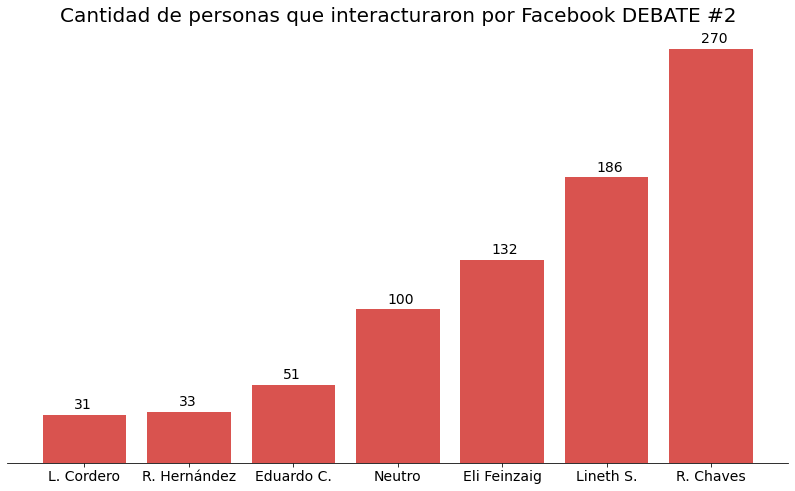

In [343]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
ax.bar(candidates,np.sort(results),color='#d9534f')
#plt.grid(True);
#plt.xlabel('Candidatos', fontsize=16)
#plt.ylabel('Cantidad de personas', fontsize=16)
plt.title('Cantidad de personas que interacturaron por Facebook DEBATE #2', fontsize=20)
#Remove the borders 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#Remove the yticks 
ax.get_yaxis().set_ticks([])

#Chance the xlabel to font size 14
ax.tick_params(axis="x", labelsize=14)

#Add top bar labels

for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.30, p.get_height() + 4),fontsize=14)

In [270]:
df4[df4.commenter_name.str.contains('Sianny Barrantes')].comment_text

27      Eduardo Cruickshank fue elegido como político ...
28      Las propuestas las tiene Cruickshank y su capa...
81      Cuando don Eduardo piensa en la familia, piens...
117     El sabe de lo que habla, sin guiones como otro...
139     Queremos un presidente que haga del país una s...
166     Eduardo Cruickshank es un hombre sabio, lleno ...
177     Programas de prevención para la salud incluyen...
246     Hay generación de empleo, eliminación de brech...
297     El PAC tuvo que llamar a Cruickhank para tranq...
451     CRUICKSHANK ES LA MEJOR OPCIÓN. VAMOS POR ESAS...
456     Queremos propuestas, no discursos, excelente d...
484     Escuchemos a Cruickhank el futuro presidente d...
487                          Cruickshank presidente 🟡🔵🟡🔵🟡
488                              Eduardo Cruickshank 🔵🟡🔵🟡
493     Cruickshank será el presidente que nos dé un g...
496     Escuchemos al siguiente presidente don Eduardo...
500     Yo VOTO por la COSTA RICA de OPORTUNIDADES 🟡🔵🟡...
503        Cru

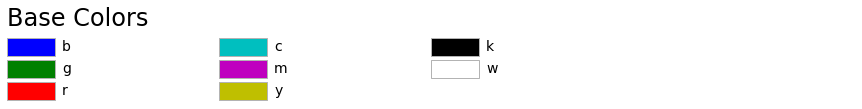

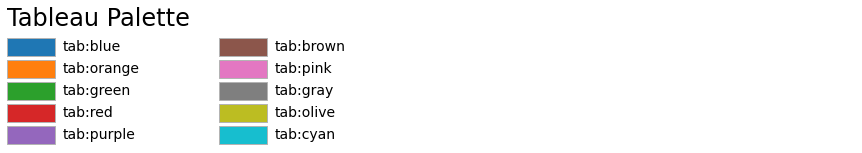

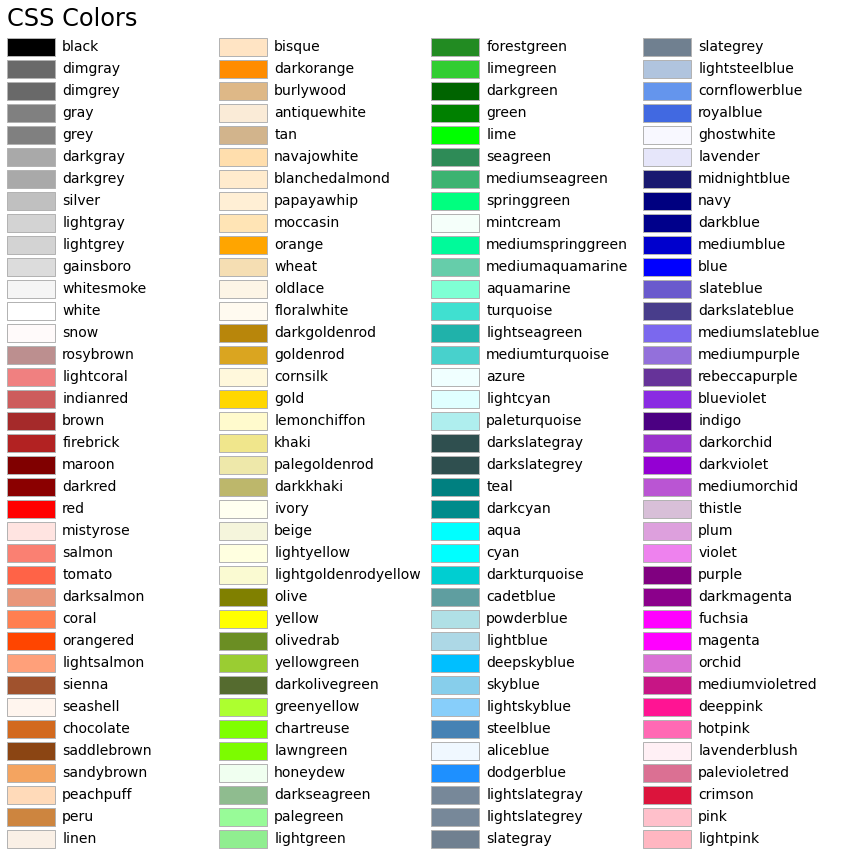

In [321]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
# xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
# xkcd_fig.savefig("XKCD_Colors.png")

plt.show()